In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [2]:
#from platform import python_version
#python_version()

In [3]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [4]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Berkeley_23'

## Getting RA&DEC from Bica 2019

In [5]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec

(98.30833, 20.53056)

## Querying the data

In [6]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [7]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [8]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.2))'

In [9]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [10]:
data = job.get_results()
len(data)

5423

In [11]:
#data

## Converting to pandas

In [12]:
df = data.to_pandas()
df

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


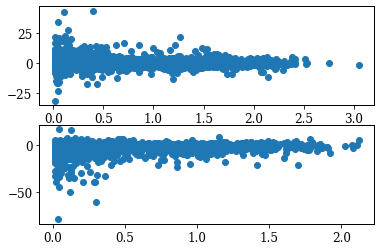

In [13]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [14]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

-2.379367479303158 0.3661494255065918
0.28730170694035606 0.4801464378833771


## Dropping uknown values of pmra, pmdec or parallax.

In [15]:
ndf = df.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


In [16]:
x = ndf['pmra']
y = ndf['pmdec']

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

## Creating the arrays to perform the 2-D KNN fit and 5-D DBSCAN fit

In [18]:
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
jpt = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the KNN on the pmra and pmdec.

0.20864083386376095


<Figure size 360x360 with 0 Axes>

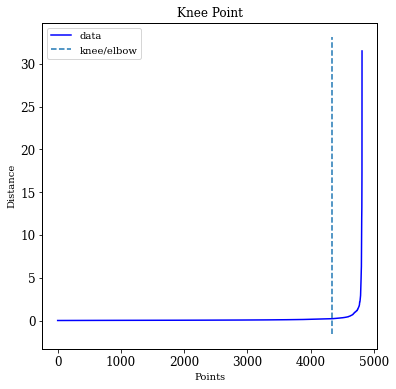

In [19]:
from sklearn.neighbors import NearestNeighbors
vizinhos = np.sqrt(len(data)).astype(int)
nn = NearestNeighbors(n_neighbors=vizinhos).fit(X)
distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


eps_opt = distances[knee.knee]
nmin = int(0.005*len(data))

print(distances[knee.knee])

In [20]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Performing DBSCAN

Estimated no. of clusters: 1
Estimated no. of noise points: 4554
Estimated no. points clustered: 258


Text(0, 0.5, 'pmdec')

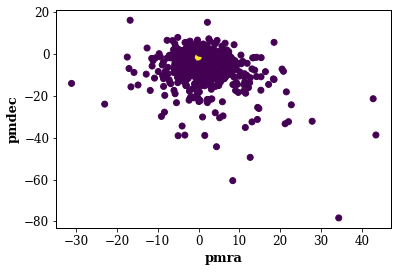

In [21]:
db = DBSCAN(eps=eps_opt, min_samples=nmin).fit(jpt)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)


plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            )
plt.xlabel("pmra", fontweight = 'bold')
plt.ylabel("pmdec", fontweight = 'bold')

## Getting the points that are clustered

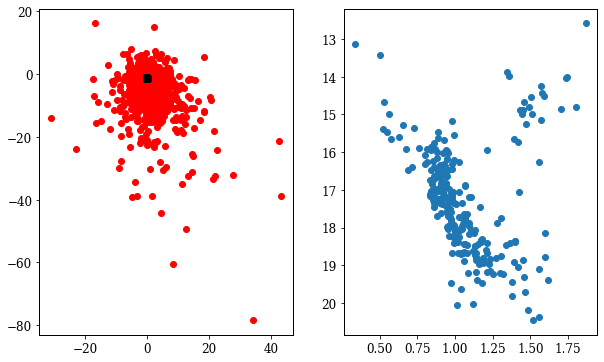

In [22]:
pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]
subset = subset.reset_index(drop=True)

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')


ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


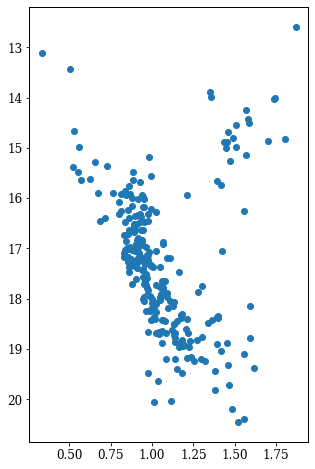

In [23]:
plt.figure(figsize=(5,8))
plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

## Constructing a RDP and histograms of the clusters parameters

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

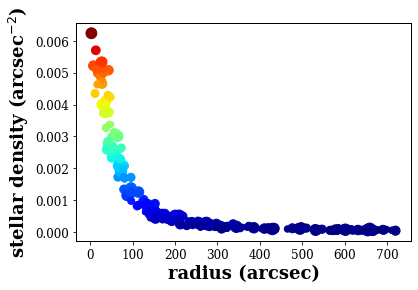

In [24]:
from astropy.coordinates import SkyCoord
from astropy import units

catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## Plotting histograms

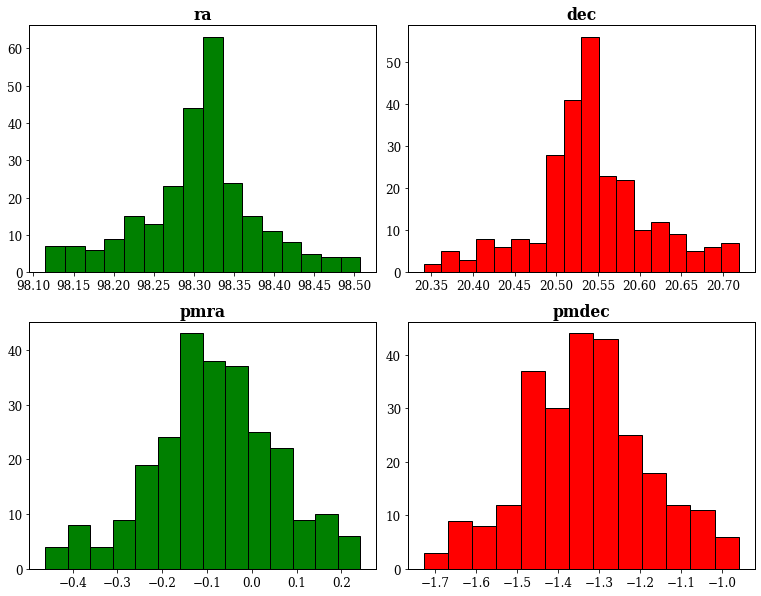

In [25]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


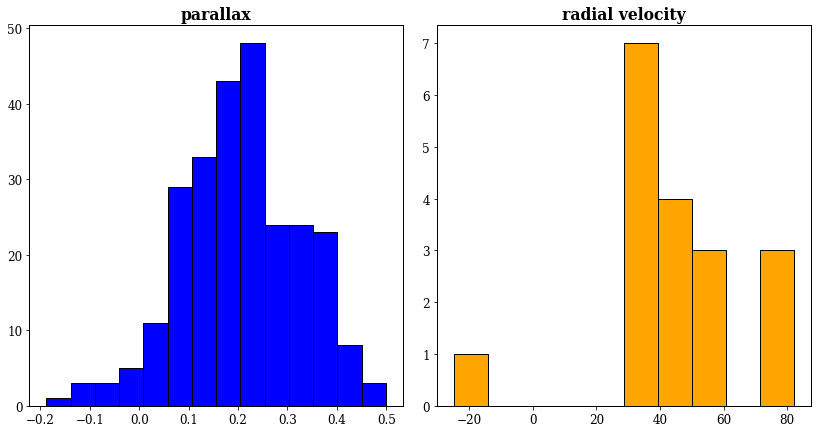

In [26]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [27]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 14
    # variables        = 3
    chi-square         = 278.252843
    reduced chi-square = 25.2957130
    Akaike info crit   = 47.8526203
    Bayesian info crit = 49.7697923
[[Variables]]
    amplitude:  13.6331187 +/- 0.95959264 (7.04%) (init = 11.18055)
    center:     0.20904660 +/- 0.01040494 (4.98%) (init = 0.1556862)
    sigma:      0.12838567 +/- 0.01049316 (8.17%) (init = 0.07929465)
    fwhm:       0.30232514 +/- 0.02470950 (8.17%) == '2.3548200*sigma'
    height:     42.3632000 +/- 2.97614565 (7.03%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.582


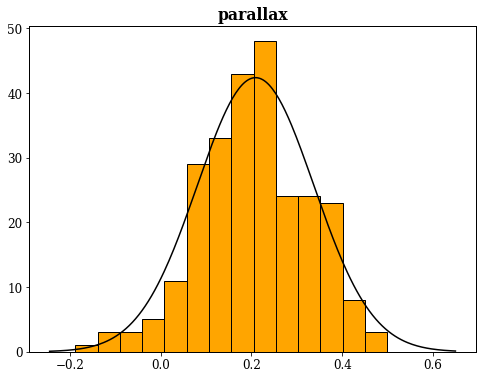

In [28]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(1.3*bins[0],1.3*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

In [29]:
#primeiro_clip = subset.parallax[np.where((subset.parallax < sigma_parallax_up ) & (subset.parallax > sigma_parallax_down))[0]]
#primeiro_clip

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 16
    # variables        = 3
    chi-square         = 823.853360
    reduced chi-square = 63.3733354
    Akaike info crit   = 69.0624613
    Bayesian info crit = 71.3802275
[[Variables]]
    amplitude:  5.13929572 +/- 0.58801440 (11.44%) (init = 11.59544)
    center:     98.3148930 +/- 0.00517291 (0.01%) (init = 98.32412)
    sigma:      0.03915285 +/- 0.00517271 (13.21%) (init = 0.06551095)
    fwhm:       0.09219791 +/- 0.01218080 (13.21%) == '2.3548200*sigma'
    height:     52.3661101 +/- 5.99149729 (11.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


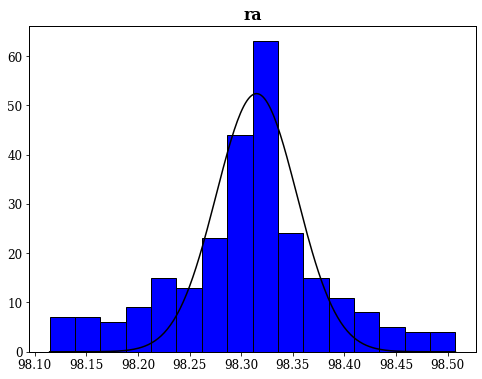

In [30]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 14
    # variables        = 3
    chi-square         = 175.876949
    reduced chi-square = 15.9888136
    Akaike info crit   = 41.4301818
    Bayesian info crit = 43.3473537
[[Variables]]
    amplitude:  13.5683828 +/- 0.80139323 (5.91%) (init = 12.67597)
    center:    -0.08020410 +/- 0.00941469 (11.74%) (init = -0.08240104)
    sigma:      0.13839705 +/- 0.00948622 (6.85%) (init = 0.1083416)
    fwhm:       0.32590014 +/- 0.02233835 (6.85%) == '2.3548200*sigma'
    height:     39.1121188 +/- 2.30645105 (5.90%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.582


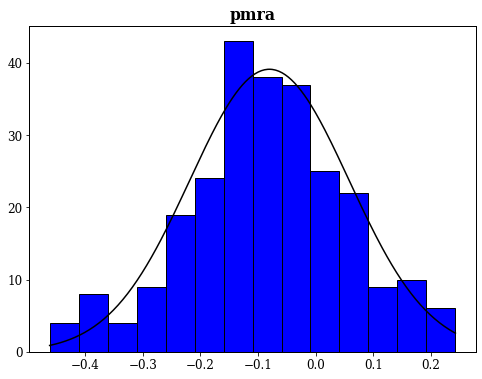

In [31]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 65
    # data points      = 18
    # variables        = 3
    chi-square         = 724.092927
    reduced chi-square = 48.2728618
    Akaike info crit   = 72.5018636
    Bayesian info crit = 75.1729789
[[Variables]]
    amplitude:  4.47672853 +/- 0.46978275 (10.49%) (init = 10.22368)
    center:     20.5354329 +/- 0.00467723 (0.02%) (init = 20.54121)
    sigma:      0.03859813 +/- 0.00467706 (12.12%) (init = 0.06310916)
    fwhm:       0.09089164 +/- 0.01101363 (12.12%) == '2.3548200*sigma'
    height:     46.2705457 +/- 4.85558489 (10.49%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


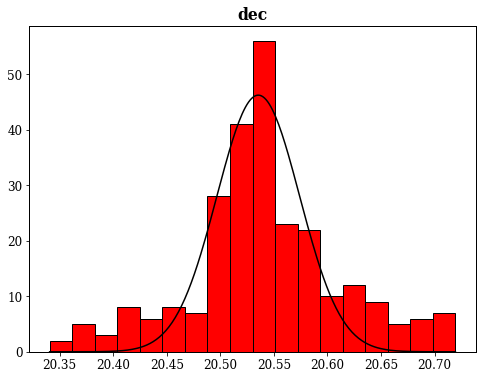

In [32]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 13
    # variables        = 3
    chi-square         = 298.375211
    reduced chi-square = 29.8375211
    Akaike info crit   = 46.7342316
    Bayesian info crit = 48.4290797
[[Variables]]
    amplitude:  16.2421466 +/- 1.27677517 (7.86%) (init = 15.80464)
    center:    -1.33649115 +/- 0.01435134 (1.07%) (init = -1.343561)
    sigma:      0.15857049 +/- 0.01447606 (9.13%) (init = 0.128493)
    fwhm:       0.37340496 +/- 0.03408852 (9.13%) == '2.3548200*sigma'
    height:     40.8630846 +/- 3.20667734 (7.85%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.582


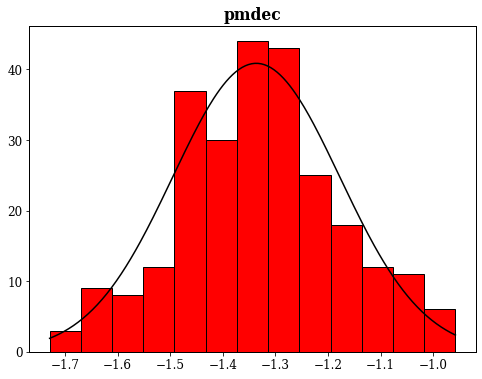

In [33]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 181
    # data points      = 10
    # variables        = 3
    chi-square         = 18.5807007
    reduced chi-square = 2.65438581
    Akaike info crit   = 12.1953835
    Bayesian info crit = 13.1031388
[[Variables]]
    amplitude:  144.701143 +/- 36.8647199 (25.48%) (init = 374.2165)
    center:     38.5194090 +/- 2.24573053 (5.83%) (init = 34.52029)
    sigma:      7.43530257 +/- 2.96618665 (39.89%) (init = 17.81983)
    fwhm:       17.5087992 +/- 6.98483564 (39.89%) == '2.3548200*sigma'
    height:     7.76396201 +/- 2.46186591 (31.71%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.608
    C(center, sigma)     = -0.483
    C(amplitude, center) = -0.228


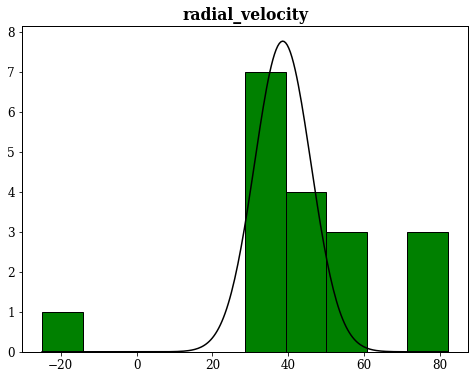

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()


In [35]:
sigma = 3

paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]

print(paralaxe_up,paralaxe_down)

ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]

print(ra_up,ra_down)

pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

print(pmra_up,pmra_down)

dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]

print(dec_up,dec_down)

pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

print(pmdec_up,pmdec_down)

radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]

print(radvel_up,radvel_down)

0.5942036031980402 -0.17611040338779066
98.43235150269336 98.19743440254871
0.33498704705252635 -0.49539525248805727
20.651227301307333 20.419638542179168
-0.8607796830581735 -1.8122026224994618
60.82531674566059 16.213501299611234


In [36]:
clip = subset.loc[(subset.parallax < paralaxe_up ) & (subset.parallax > paralaxe_down) & (subset.ra>ra_down) & (subset.ra<ra_up)
          & (subset.dec>dec_down) & (subset.dec<dec_up) & (subset.pmra>pmra_down) & (subset.pmra<pmra_up) & (subset.pmdec>pmdec_down) & (subset.pmdec<pmdec_up)]
len(clip)

189

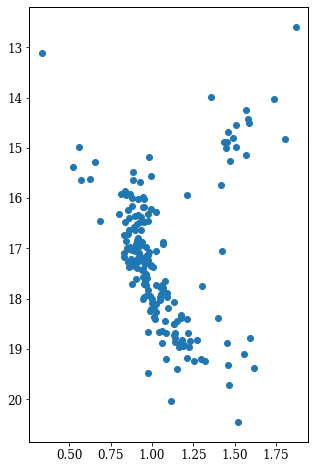

In [37]:
plt.figure(figsize=(5,8))
plt.scatter(clip['bp_rp'],clip['phot_g_mean_mag'])
plt.gca().invert_yaxis()